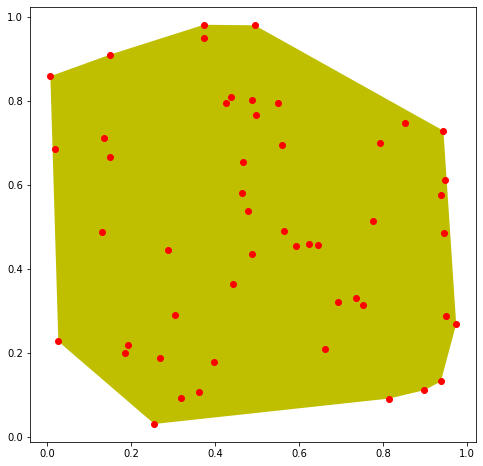

In [105]:
# import numpy as np
import matplotlib.pyplot as plt
import random

# define a point class for convenience
class PointR2:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
    def __repr__(self):
        return '(' + str(self.x1) + ', ' + str(self.x2) + ')'
    def __str__(self):
        return '(' + str(self.x1) + ', ' + str(self.x2) + ')'
    def add(self, p):
        return PointR2(self.x1 + p.x1, self.x2 + p.x2)
    def subtract(self, p):
        return PointR2(self.x1 - p.x1, self.x2 - p.x2)
    def sqrLen(self):
        return self.x1*self.x1 + self.x2*self.x2

# View p and q as vectors in R3 and return the x3-component of p x q
def crossProd(p, q):
    return p.x1 * q.x2 - q.x1 * p.x2

# return square of Euclidean distance
def sqrDist(p, q):
    return (p.x1 - q.x1)**2 + (p.x2 - q.x2)**2
    
# where is the point r w.r.t. the line pq
# if r > 0 then r is to the left of pq
# if r < 0 then r is to the right of pq
# if r = 0 then p,q,r are colinear
def orientation(p, q, r):
    return crossProd(q.subtract(p), r.subtract(p))



# given a finite set T of points in R2,
# find the boundary polygon of conv(T)
# returns the vertices of the polygon clockwise
# The algorithm is basically a selection sort based on the 'leftness' of a point w.r.t others
def getConvexHullR2(T):
    # minimize over x1-coodinate of points
    p = min(T, key = lambda point: point.x1)
    # get the index of the x1-coord minimizer in the list T
    index = T.index(p);   
    
    l = index
    # initialize a list of 
    result = []
    result.append(p)
    while(True):
        # q is chosen so that q != l
        q = (l + 1) % len(T)
        for i in range(len(T)):
            if i == l:
                continue
            
            # get the orientation of T[i] w.r.t line T[l]T[q]
            d = orientation(T[l], T[q], T[i])
            # if T[i] is to the left of T[l]T[q], do i->q (i is the new leftmost point)
            # if T[i] lies on T[l]T[q], choose T[i] as the new point only if 
            # length of T[l]T[i] is greater than length of T[l]T[q]
            # if i = q then we ignore it
            if d > 0 or (d == 0 and sqrDist(T[l],T[i]) > sqrDist(T[l],T[q])):
                q = i
        # After the for-loop terminates, T[q] is the leftmost w.r.t. T[l]
        l = q
        # we have closed the polygon and are finished
        if l == index:
            break
        # otherwise add T[q] to the path
        result.append(T[q])
    return result
        
# initialize a list of N random points
N = 50
T = [PointR2(a[0], a[1]) for a in 
    [[random.random() for i in range(2)] for j in range(N)]]
# print(T)  
# Compute the convex hull
hull = getConvexHullR2(T)
#print(hull)


#-------------------- Plotting ------------------#


# Plot the points here

# Plot the polygon given a set of points
# def plotPolygon(T):
    
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.fill([p.x1 for p in hull], [p.x2 for p in hull], 'y')
plt.plot([p.x1 for p in T], [p.x2 for p in T], 'or')
plt.show()